**In this tutorial I want you to show how to use `calculate_discrete_NPHT_2d` and `distance_npht2D`.<br>**
You can skip the next cell, it contains just helper stuff. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from shared_code import check_pershombox_availability
check_pershombox_availability()
from pershombox import calculate_discrete_NPHT_2d, distance_npht2D

def binary_E():
    c = np.zeros((5, 7))
    c[1:4, 1] = 1
    c[1, 2:6] = 1
    c[2, 3] = 1
    c[1:4, 5] = 1
    return c

def binary_P():
    c = np.zeros((5, 7))    
    c[1, 1:6] = 1
    c[3, 4:6] = 1
    c[2:4, 3] = 1
    c[2, 5] = 1
    return c    

def to_img_coordinates(arr):
    ret = arr.T
    return np.flipud(ret)

def plot_binary_complex(ax, binary_complex):
    ax.matshow(to_img_coordinates(binary_complex), cmap=plt.cm.binary)
    ax.axis('off')

At first let us construct a cubical complex of the letter 'E'. 

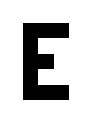

In [3]:
E = binary_E()
plt.figure(figsize=(2, 2))
ax = plt.gca()
plot_binary_complex(ax, E)
plt.show()

Now we can invoke `calculate_discrete_NPHT_2d` on `E` with the desired number of directions `n`. 
`calculate_discrete_NPHT_2d` partitions the unit circle counter clockwise into `n` directions. 
Then `E` is filtrated along each direction (normalized with respect to the diameter of the bounding circle centered at the barycenter) and the persistence barcodes are returned. <br>
Conclusively, if `npht_E` is the return value then <br>
<p>
<center>
`npht_E[i][j]` = diagram in direction `i` of dimension `j`.
</center>
</p>

In [4]:
npht_E = calculate_discrete_NPHT_2d(E, 4)
npht_E

[[[(0.3532723671473885, 0.772494175297707)], []],
 [[(0.08077819184968146, 0.9192218081503185)], []],
 [[(0.22750582470229294, 0.6467276328526115),
   (0.4371167287774523, 0.6467276328526115),
   (0.22750582470229294, 0.6467276328526115)],
  []],
 [[(0.08077819184968146, 0.9192218081503185)], []]]

Lets take a closer look at `npht_E[2]` which the filtration in direction `(-1, 0)` ...

In [5]:
npht_E[2]

[[(0.22750582470229294, 0.6467276328526115),
  (0.4371167287774523, 0.6467276328526115),
  (0.22750582470229294, 0.6467276328526115)],
 []]

We nicely see the expected 3 bar codes in the dimension zero (`npht_E[2][0]`). As you might notice there is no 
essential barcode (i.e. with infinite life span). The reason is that `calculate_discrete_NPHT_2d` implicitly maps 
essential classes to the maximum of the filtration value. This makes sense as we get some additional information about the binary complex's size.

Now the same procedur for a P ...

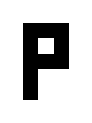

In [6]:
P = binary_P()
plt.figure(figsize=(2, 2))
ax = plt.gca()
plot_binary_complex(ax, P)
plt.show()

In [9]:
npht_P = calculate_discrete_NPHT_2d(P, 4)
npht_P

[[[(0.3476121364481081, 0.7285817953278377)],
  [(0.7285817953278377, 0.7285817953278377)]],
 [[(0.023787926400337948, 0.7857272441597971)],
  [(0.7857272441597971, 0.7857272441597971)]],
 [[(0.2714182046721622, 0.6523878635518919)],
  [(0.6523878635518919, 0.6523878635518919)]],
 [[(0.21427275584020278, 0.976212073599662)],
  [(0.5952424147199324, 0.976212073599662)]]]

As we see, this time we also get a nontrivial 1-class, a circle. 

Now let's invoke `distance_npht2D` to calculate the distance of P and E. 

In [10]:
distance_npht2D(npht_P, npht_E)

1.3793571276155214